# LSSGALPY - Wedge diagram

## Python tool for the interactive visualization of the large-scale environment around galaxies on the 3D space.

#### This code contains the visualisation tools developed for the A&A Article Catalogues of isolated galaxies, isolated pairs, and isolated triplets in the local Universe by M. Argudo-Fernández, S. Verley, G. Bergond, S. Duarte Puertas, E. Ramos Carmona, J. Sabater, M. Fernández-Lorenzo, D. Espada, J. Sulentic, J. E. Ruiz, and S. Leon.

### How it all works

#### The code uses the interactive nature of the ipython notebook to create an interactive visualization of the LSS of galaxies in the local Universe using a wedge diagram in combination with a Mollweide projection. 

#### The following code import the needed libraries, so execute this cell first:

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

#### Run the following code to load the catalogues of galaxies that will be represented. In this case we represent the LSS by all the galaxies in the local Universe (with redshift less than 0.1) from the SDSS. We will visualize where are located isolated galaxies, isolated pairs, and isolated triplets with respect to SDSS galaxies.  We also set the default values of the visualization at declination 0 degrees, with a declination range 5., for the wedge diagram representation. This ranges will be also shown by a red line in the complemented Mollweide projection. We select a default value of 0.2 for the transparency. 

In [2]:
[ra, dec, z], [ra_isol, dec_isol, z_isol], [ra_pair, dec_pair, z_pair], [ra_trip, dec_trip, z_trip] = [np.loadtxt(filename+'.txt', usecols = (0, 1, 2), unpack=True) for filename in ['SDSS_DR10_galaxy_local', 'table1', 'table2', 'table3']]

decstart, decrange, alpha0, raCen, raDelta = 0., 5., .2, 0., 180.
ra_tot, dec_tot, z_tot = [ra, ra_isol, ra_pair, ra_trip], [dec, dec_isol, dec_pair, dec_trip], [z, z_isol, z_pair, z_trip]
rad_tot = [np.radians(raval) for raval in ra_tot]

#### The following code creates the representation. 

In [3]:
def plotSkymap(SDSS=True, Isolated=True, Pairs=False, Triplets=False, Opacity=alpha0, DecRange=decrange, Declination=decstart):
    plt.figure(figsize=(15, 15))
    gs = gridspec.GridSpec(1, 2)
    ax1, ax2 = [plt.subplot(gs[i], polar=val, projection=pj) for i, val, pj in zip(range(0, 2), [True, False], [None, 'mollweide'])]
    [ax.grid(True) for ax in [ax1, ax2]]
    
    cond_dec = [((decval > Declination) & (decval < Declination + DecRange)) for decval in dec_tot]
    xyplt = [ax1.plot(rad_tot[i][cond_dec[i]], z_tot[i][cond_dec[i]], krgb, ms=mval, alpha=alpval, visible=visi)[0] 
             for i, krgb, mval, alpval, visi in zip(range(0, 4), ['k.', 'ro', 'go', 'bo'], [1, 4, 4, 4], 
                                                   [Opacity, .7, .7, .7], [SDSS, Isolated, Pairs, Triplets])]
    x, y = [np.radians(val) for val in [-1*(ra - 180), dec]]

    H, xedges, yedges = np.histogram2d(x.T, y.T, bins=50)
    extent, levels = [xedges[0], xedges[-1], yedges[0], yedges[-1]], [100, 10000]
    ax2.contourf(H.T, levels, origin='lower', colors='b', lw=1, extent=extent, alpha=.3)
    
    [plt.setp(gtval, fontsize=fontval, alpha=.6) for gtval, fontval in zip([ax2.get_xticklabels(), ax2.get_yticklabels()], [8, 12])]
    x_rect, y_rect = [np.radians(val) for val in [raCen + np.array([-1, -1, 1, 1, -1])*raDelta, Declination + np.array([0, 1, 1, 0, 0])*DecRange]]
    ax2.fill(x_rect, y_rect, 'r', lw=0, alpha=.5)
    
    plt.show()

#### Run the following code to interact with the representation.

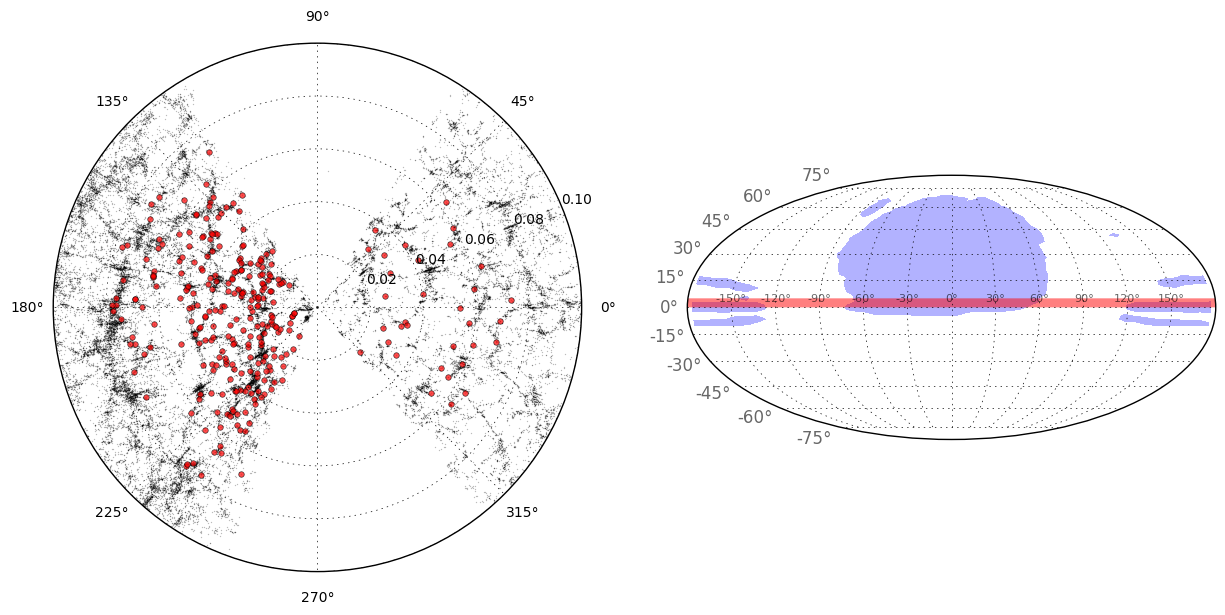

<function __main__.plotSkymap>

In [4]:
interact(plotSkymap, SDSS=True, Isolated=True, Pairs=False, Triplets=False,
         Declination=widgets.FloatSlider(min=-20.0, max=90.0, step=2.0, value=decstart),
         DecRange=widgets.FloatSlider(min=0.0, max=90.0, step=1.0, value=decrange),
         Opacity=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=alpha0))